In [1]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from numpy import array
from numpy import argmax
import numpy

In [2]:
# fit model on dataset
def fit_model(trainX, trainY):
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainY, epochs=200, verbose=0)
    return model

In [3]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, textX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

In [4]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testY):
    # select a subset of members
    subset = members[:n_members]
    print(len(subset))
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testY, yhat)

In [5]:
# generate 2d classification dataset
X, Y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2,
                 random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]
trainY = to_categorical(trainY)

In [7]:
# fit all models
n_members = 20
members = [fit_model(trainX, trainY) for _ in range(n_members)]

W1228 08:15:27.931039  5928 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1228 08:15:27.952981  5928 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1228 08:15:27.954974  5928 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1228 08:15:27.991876  5928 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1228 08:15:28.019848  5928 deprecation_wrapper.py:119] From C:\Users\Lenovo

In [8]:
# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
    score = evaluate_n_members(members, i, testX, testY)
    print('> %.3f' % score)
    scores.append(score)

1
> 0.763
2
> 0.783
3
> 0.769
4
> 0.769
5
> 0.766
6
> 0.771
7
> 0.769
8
> 0.769
9
> 0.766
10
> 0.766
11
> 0.763
12
> 0.763
13
> 0.763
14
> 0.763
15
> 0.763
16
> 0.763
17
> 0.763
18
> 0.763
19
> 0.763
20
> 0.763


In [9]:
# plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)]

In [10]:
x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

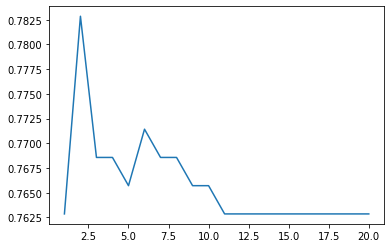

In [11]:
pyplot.plot(x_axis, scores)
pyplot.show()